# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Who: This data story is for environmental policy makers and public health officials who need to understand how our environment is changing and why it matters.

What: The data shows that ecological health is getting worse over time, likely due to pollution and climate change. This includes declines in air and water quality, biodiversity, and other key indicators. The goal is to raise awareness and encourage action to protect the environment.

How: We will use clear visuals like line charts to show trends over time, bar charts to highlight key problems, and color to make the message easy to grasp. The story will be simple, focused, and designed to support better decision-making.



# 3. Homework - work with your own data

In [33]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
# Read the Dataset
df = pd.read_csv('ecological_health.csv')


This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [34]:

# Show basic information about the data
print("\nBasic Information:")
df.info()
print("\nSummary Statistics:")
print(df.describe())
 # Check for duplicate rows
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
        print(f"\n There are {duplicate_rows} duplicate rows.")
else:
        print("\n No duplicate rows found.")

# Check for duplicate values in the 'timestamp' column
print("\nDuplicate Values in 'Timestamp' Column:")
Timestamp_duplicates = df['Timestamp'].duplicated().sum()
print(Timestamp_duplicates)

# mean, median, and mode
print("\n Mean (Average) Values:")
print(df.mean(numeric_only=True))
print("\n Median Values:")
print(df.median(numeric_only=True))
print("\n Mode Values:")
mode = df.mode(numeric_only=True)
if not mode.empty:
        print(mode.iloc[0])
else:
        print("No mode values found.")

# Check for missing data
print("\n Missing Values:")
missing = df.isnull().sum()
print(missing)
if missing.any():
        print(" Missing values found")
        df_cleaned = df.dropna()
else:
        print("No missing values.")
        df_cleaned = df.copy()
# Check how many invalid values exist for Dissolved_Oxygen
invalid_count = (df['Dissolved_Oxygen'] < 0).sum()
print("Number of rows with Dissolved_Oxygen < 0:", invalid_count)
df_cleaned = df[df['Dissolved_Oxygen'] >= 0]
# one-hot encoding
print("\nConverting Categories to Numbers (One-Hot Encoding):")
df_encoded = pd.get_dummies(df_cleaned, columns=['Pollution_Level', 'Ecological_Health_Label'])

#  Check class distribution in Pollution_Level
print("Pollution_Level distribution:")
print(df_cleaned['Pollution_Level'].value_counts())
# Check class distribution in Ecological_Health_Label
print("Ecological_Health_Label distribution:")
print(df_cleaned['Ecological_Health_Label'].value_counts())
# Show how many rows and columns we have
print("\n Final Data Sizes:")
print("Original data:", df.shape)
print("After cleaning:", df_cleaned.shape)
print("After encoding:", df_encoded.shape)


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61345 entries, 0 to 61344
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  61345 non-null  object 
 1   PM2.5                      61345 non-null  float64
 2   Temperature                61345 non-null  float64
 3   Humidity                   61345 non-null  float64
 4   Soil_Moisture              61345 non-null  float64
 5   Biodiversity_Index         61345 non-null  int64  
 6   Nutrient_Level             61345 non-null  int64  
 7   Water_Quality              61345 non-null  int64  
 8   Air_Quality_Index          61345 non-null  float64
 9   Pollution_Level            61345 non-null  object 
 10  Soil_pH                    61345 non-null  float64
 11  Dissolved_Oxygen           61345 non-null  float64
 12  Chemical_Oxygen_Demand     61345 non-null  float64
 13  Biochemical_Oxygen_Demand 

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

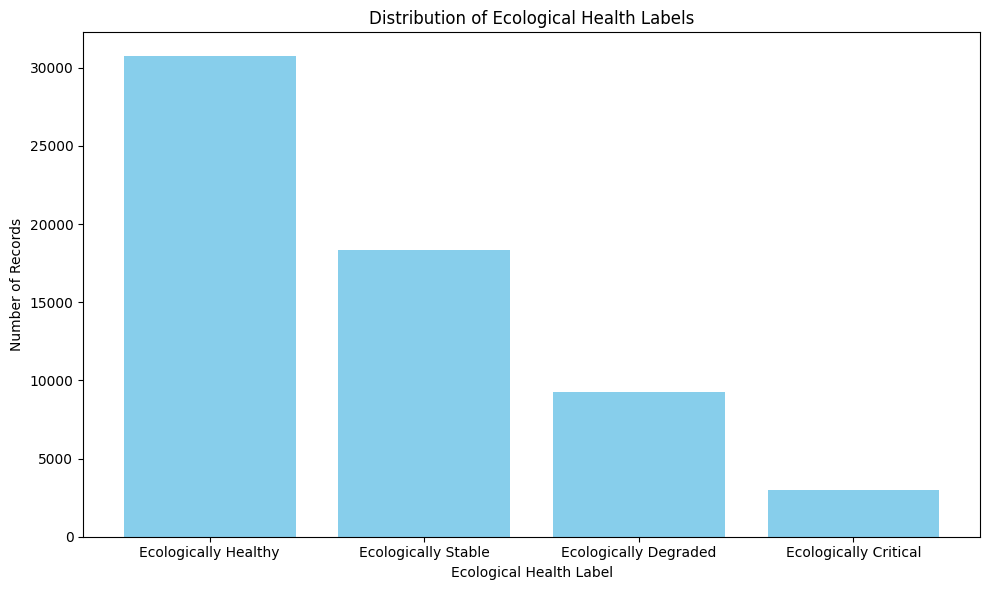

In [35]:
import matplotlib.pyplot as plt

# Count values in the 'Ecological_Health_Label' column
counts = df_cleaned['Ecological_Health_Label'].value_counts()

# Bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color='skyblue')

# Titles and labels
plt.title('Distribution of Ecological Health Labels')
plt.xlabel('Ecological Health Label')
plt.ylabel('Number of Records')
plt.tight_layout()
plt.show()
